In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
acc = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [3]:
# acc['latitude'][0]

In [4]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202130 entries, 0 to 202129
Data columns (total 47 columns):
Unnamed: 0         202130 non-null int64
OBJECTID           202130 non-null int64
INCKEY             202130 non-null int64
COLDETKEY          202130 non-null int64
REPORTNO           202130 non-null object
STATUS             202130 non-null object
ADDRTYPE           202130 non-null object
INTKEY             67263 non-null float64
LOCATION           202130 non-null object
EXCEPTRSNCODE      84141 non-null object
EXCEPTRSNDESC      7190 non-null object
SEVERITYCODE       202129 non-null object
SEVERITYDESC       202130 non-null object
COLLISIONTYPE      179243 non-null object
PERSONCOUNT        202130 non-null int64
PEDCOUNT           202130 non-null int64
PEDCYLCOUNT        202130 non-null int64
VEHCOUNT           202130 non-null int64
INJURIES           202130 non-null int64
SERIOUSINJURIES    202130 non-null int64
FATALITIES         202130 non-null int64
INCDATE            20

In [5]:
acc.columns

Index(['Unnamed: 0', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'longitude',
       'latitude', 'year', 'month', 'week', 'day', 'hour', 'weekday'],
      dtype='object')

In [6]:
acc.head(1)

,Unnamed: 0,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,CROSSWALKKEY,HITPARKEDCAR,longitude,latitude,year,month,week,day,hour,weekday
0,0,1,300647,301861,E828639,Matched,Block,NaN,WEEDIN E PL NE BETWEEN WEEDIN PL NE AND 8TH AV...,,...,0,N,-122.319483,47.675997,2018,8,33,15,20,2


In [7]:
acc.iloc[0]

Unnamed: 0                                                         0
OBJECTID                                                           1
INCKEY                                                        300647
COLDETKEY                                                     301861
REPORTNO                                                     E828639
STATUS                                                       Matched
ADDRTYPE                                                       Block
INTKEY                                                           NaN
LOCATION           WEEDIN E PL NE BETWEEN WEEDIN PL NE AND 8TH AV...
EXCEPTRSNCODE                                                       
EXCEPTRSNDESC                                                    NaN
SEVERITYCODE                                                       1
SEVERITYDESC                          Property Damage Only Collision
COLLISIONTYPE                                                 Angles
PERSONCOUNT                       

In [8]:
acc.SEGLANEKEY.unique()

array([    0, 42680, 45509, ...,  6397, 44360,  3800])

In [9]:
acc.LIGHTCOND.unique()

array(['Daylight', 'Unknown', 'Dark - Street Lights On', 'Dusk',
       'Dark - No Street Lights', nan, 'Other', 'Dawn',
       'Dark - Street Lights Off'], dtype=object)

In [10]:
acc.COLLISIONTYPE.unique()

array(['Angles', 'Rear Ended', 'Parked Car', 'Other', 'Sideswipe',
       'Right Turn', 'Pedestrian', 'Head On', 'Left Turn', nan, 'Cycles'],
      dtype=object)

In [11]:
len(acc['ST_COLDESC'].unique())

63

In [12]:
len(acc['ST_COLCODE'].unique())

64

In [13]:
acc.JUNCTIONTYPE.unique()

array(['Driveway Junction', 'Mid-Block (not related to intersection)',
       'At Intersection (intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Mid-Block (but intersection related)', 'Ramp Junction', 'Unknown'],
      dtype=object)

In [14]:
acc.SDOT_COLCODE.unique()

array([11., 14., 28.,  0., 13., 24., 16., 15., 51., 26., 18., 54., 12.,
       48., 29., 64., 25., 69., 31., 21., 27., 23., 34., 55., 56., 33.,
       nan, 44., 32., 66., 36., 22., 47., 58., 35., 61., 53., 46., 68.,
       52.])

In [15]:
len(acc.SDOT_COLDESC.unique())

40

In [16]:
acc.ROADCOND.unique()

array(['Dry', 'Unknown', 'Wet', nan, 'Other', 'Snow/Slush', 'Ice',
       'Standing Water', 'Sand/Mud/Dirt', 'Oil'], dtype=object)

In [17]:
acc.ST_COLCODE.unique()

array(['10', '14', '32', '50', '11', '16', '0', '12', '24', '28', ' ',
       '20', '6', '23', '13', '26', '5', '1', '56', '7', '27', '15', '2',
       '40', '52', '71', '72', '30', '51', '88', '84', '81', '73', '25',
       '29', '41', '48', nan, '45', '53', '19', '3', '74', '22', '21',
       '83', '4', '66', '57', '65', '82', '67', '49', '31', '42', '43',
       '64', '54', '60', '87', '17', '8', '18', '85'], dtype=object)

In [18]:
acc.columns

Index(['Unnamed: 0', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'longitude',
       'latitude', 'year', 'month', 'week', 'day', 'hour', 'weekday'],
      dtype='object')

In [19]:
[(column, acc[column].unique()) for column in acc.columns if len(acc[column].unique()) < 100]

[('STATUS', array(['Matched', 'Unmatched'], dtype=object)),
 ('ADDRTYPE', array(['Block', 'Intersection'], dtype=object)),
 ('EXCEPTRSNCODE', array([' ', 'NEI', nan], dtype=object)),
 ('EXCEPTRSNDESC', array([nan,
         'Not Enough Information, or Insufficient Location Information'],
        dtype=object)),
 ('SEVERITYCODE', array(['1', '2', '2b', '0', '3', nan], dtype=object)),
 ('SEVERITYDESC', array(['Property Damage Only Collision', 'Injury Collision',
         'Serious Injury Collision', 'Unknown', 'Fatality Collision'],
        dtype=object)),
 ('COLLISIONTYPE',
  array(['Angles', 'Rear Ended', 'Parked Car', 'Other', 'Sideswipe',
         'Right Turn', 'Pedestrian', 'Head On', 'Left Turn', nan, 'Cycles'],
        dtype=object)),
 ('PERSONCOUNT',
  array([ 2,  3,  4,  7,  5,  1,  0,  6,  9,  8, 13, 12, 16, 17, 11, 26, 22,
         10, 37, 28, 36, 14, 19, 53, 30, 29, 23, 44, 15, 32, 21, 20, 41, 27,
         35, 43, 81, 18, 48, 25, 24, 34, 57, 39, 47, 31, 54, 93])),
 ('PEDCOUNT',

Now let's see how balanced these data are.

In [20]:
type(acc['ST_COLDESC'])

pandas.core.series.Series

In [21]:
acc['ST_COLDESC'].value_counts()

One parked--one moving                                                                   41474
Entering at angle                                                                        33110
From same direction - both going straight - one stopped - rear-end                       24221
Fixed object                                                                             12182
From same direction - both going straight - both moving - sideswipe                      11661
From opposite direction - one left turn - one straight                                   10009
From same direction - both going straight - both moving - rear-end                        6888
Vehicle - Pedalcyclist                                                                    5055
From same direction - all others                                                          4175
Vehicle going straight hits pedestrian                                                    3247
From same direction - one left turn - one straight

In [22]:
acc['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85820
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54930
NOT ENOUGH INFORMATION / NOT APPLICABLE                         14359
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE         10373
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8930
MOTOR VEHCILE STRUCK PEDESTRIAN                                  7113
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           6517
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              3986
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3158
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1723
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1668
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1384
MOTOR VEHICLE OVERTURNED IN ROAD                                  531
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       200
PEDALCYCLIST STRUCK 

In [23]:
pmvc =['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
      'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
      'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
      'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
      'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE',
      'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE']

In [24]:
X = acc[acc['ST_COLDESC'].notnull()]

In [25]:
X_pmvc = X[X['SDOT_COLDESC'].isin(pmvc)]

In [26]:
len(X_pmvc)

147045

In [27]:
X_pmvc['PEDCYLCOUNT'].sum()

210

In [28]:
X_pmvc['PEDCOUNT'].sum()

291

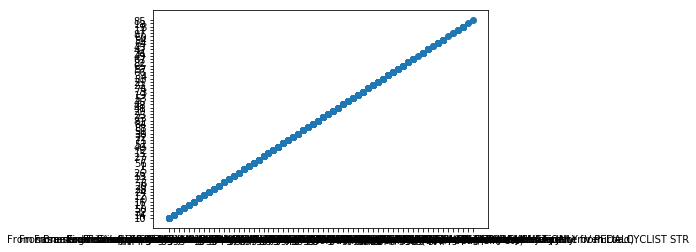

In [29]:
plt.scatter(X['ST_COLDESC'],X['ST_COLCODE'])

- perfect correlation. ST_COLDOCE could br used to complete where ST_COLDESC is missing (about 14000 rows)

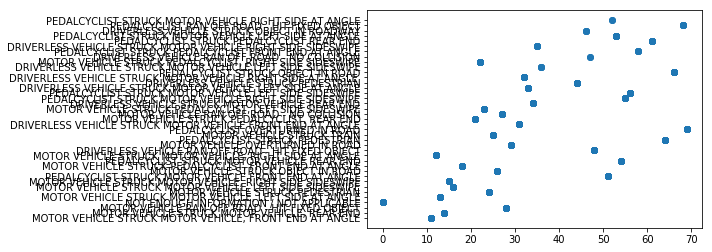

In [30]:
Xd=acc[acc['SDOT_COLCODE'].notnull()]
plt.scatter(Xd['SDOT_COLCODE'],Xd['SDOT_COLDESC'])

(no such luck here, but also it doesn't matter: they are almost all filled. We will ignore SDOT_COLCODE.)

In [31]:
years=X['year'].unique()
years.sort()
years

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [58]:
mwoc =(X['SDOT_COLDESC'].str.contains('MOTOR VEHICLE')) &  (~X['SDOT_COLDESC'].str.contains('PEDALCYCLIST')) 

In [33]:
m_cy = X['SDOT_COLDESC'].str.contains('PEDALCYCLIST')

In [34]:
X[m_cy]['COLLISIONTYPE'].head()

92         Cycles
133    Pedestrian
162        Cycles
202        Cycles
230    Pedestrian
Name: COLLISIONTYPE, dtype: object

In [35]:
X[m_cy]['PEDCYLCOUNT'].sum()

5154

In [36]:
len(X[m_cy])

5234

In [40]:
X_cyd = X[m_cy]

In [42]:
len(X_cyd[X_cyd['PEDCYLCOUNT']>0])

5110

In [43]:
len(X[X['PEDCYLCOUNT']>0])

5504

In [ ]:
X[(X['PEDCYLCOUNT']>0 & (~X['SDOT_COLDESC'].str.contains('PEDALCYCLIST')))][['PEDCYLCOUNT','SDOT_COLDESC']]

In [ ]:
X[~X['SDOT_COLDESC'].str.contains('PEDALCYCLIST')][['PEDCYLCOUNT','SDOT_COLDESC']]

In [69]:
Xnc=X[~X['SDOT_COLDESC'].str.contains('PEDALCYCLIST')]

In [87]:
X_dirty_cases=Xnc[Xnc['PEDCYLCOUNT']>0][['PEDCOUNT','PEDCYLCOUNT','SDOT_COLDESC','COLLISIONTYPE','ST_COLDESC']]

In [88]:
X_dirty_cases.loc[1207]

PEDCOUNT                                                         0
PEDCYLCOUNT                                                      1
SDOT_COLDESC     MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...
COLLISIONTYPE                                           Pedestrian
ST_COLDESC                            Vehicle Strikes Pedalcyclist
Name: 1207, dtype: object

In [77]:
(Xnc[Xnc['PEDCYLCOUNT']>0]['SDOT_COLDESC']).value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE         138
NOT ENOUGH INFORMATION / NOT APPLICABLE                        124
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    51
MOTOR VEHCILE STRUCK PEDESTRIAN                                 41
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE         13
MOTOR VEHICLE STRUCK OBJECT IN ROAD                             10
MOTOR VEHICLE OVERTURNED IN ROAD                                 7
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    3
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         2
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          2
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           1
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE      1
DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE       1
Name: SDOT_COLDESC, dtype: int64

These cases (except the 'NOT ENOUGH INFORMATION' ones) probably had a cyclist involved, but not damaged. Or are errors. We can leave them out.

In [ ]:
(X['SDOT_COLDESC'].str.contains('MOTOR VEHICLE')) &  (~X['SDOT_COLDESC'].str.contains('PEDALCYCLIST')) 

--------------

Let's look into the cases where cyclists are mentioned in SDOT_COLDESC. These seem to be the best candidates for clyclist cases.

In [ ]:
Xc = X[X['SDOT_COLDESC'].str.contains('PEDALCYCLIST')]

In [95]:
len(Xc)

5234

In [94]:
Xc['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE      2984
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE       1330
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                 195
PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE       182
PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END                  135
MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE      126
PEDALCYCLIST STRUCK PEDESTRIAN                               82
PEDALCYCLIST OVERTURNED IN ROAD                              79
PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT SIDE SIDESWIPE       49
PEDALCYCLIST STRUCK OBJECT IN ROAD                           27
MOTOR VEHICLE STRUCK PEDALCYCLIST, RIGHT SIDE SIDESWIPE      17
PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE AT ANGLE          9
PEDALCYCLIST STRUCK PEDALCYCLIST REAR END                     7
PEDALCYCLIST STRUCK PEDALCYCLIST FRONT END AT ANGLE           5
PEDALCYCLIST RAN OFF ROAD - HIT FIXED OBJECT                  5
PEDALCYCLIST STRUCK MOTOR VEHICLE RIGHT 

In [ ]:
Xc[['PEDCYLCOUNT','SDOT_COLDESC','COLLISIONTYPE']]

In [98]:
Xc['PEDCYLCOUNT'].value_counts()

1    5066
0     124
2      44
Name: PEDCYLCOUNT, dtype: int64

In [99]:
Xc['COLLISIONTYPE'].value_counts()

Cycles        4854
Pedestrian     244
Other           44
Angles          31
Left Turn       24
Parked Car      11
Sideswipe       10
Rear Ended       7
Right Turn       5
Head On          4
Name: COLLISIONTYPE, dtype: int64

COLLISIONTYPE is apparently not well defined. Let's ignore it.

In [106]:
Xc[Xc['PEDCYLCOUNT']==0].iloc[5]

Unnamed: 0                                                 23482
OBJECTID                                                   23483
INCKEY                                                     36683
COLDETKEY                                                  36683
REPORTNO                                                 1930990
STATUS                                                   Matched
ADDRTYPE                                                   Block
INTKEY                                                       NaN
LOCATION           20TH AVE NE BETWEEN NE 52ND ST AND NE 54TH ST
EXCEPTRSNCODE                                                NaN
EXCEPTRSNDESC                                                NaN
SEVERITYCODE                                                   1
SEVERITYDESC                      Property Damage Only Collision
COLLISIONTYPE                                         Parked Car
PERSONCOUNT                                                    2
PEDCOUNT                 

The examples with PEDCYLCOUNT = 0 are pretty consistent, exept the PEDCYLCOUNT. They all seem to be actually cycling accidents. We can keep them in our cyclist collision set.

In [107]:
X_pytest = acc[acc['SDOT_COLDESC'].str.contains('PEDALCYCLIST')]

ValueError: cannot index with vector containing NA / NaN values

In [111]:
acc[acc['SDOT_COLDESC'].isnull()]

,Unnamed: 0,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,CROSSWALKKEY,HITPARKEDCAR,longitude,latitude,year,month,week,day,hour,weekday
2402,2467,1468,3663,3663,1787335,Matched,Intersection,29797.0,BROADWAY AND CHERRY ST,NaN,...,0,N,-122.320755,47.608073,2003,10,41,6,0,0


In [113]:
acc.iloc[2402]

Unnamed: 0                           2467
OBJECTID                             1468
INCKEY                               3663
COLDETKEY                            3663
REPORTNO                          1787335
STATUS                            Matched
ADDRTYPE                     Intersection
INTKEY                              29797
LOCATION           BROADWAY AND CHERRY ST
EXCEPTRSNCODE                         NaN
EXCEPTRSNDESC                         NaN
SEVERITYCODE                            0
SEVERITYDESC                      Unknown
COLLISIONTYPE                         NaN
PERSONCOUNT                             0
PEDCOUNT                                0
PEDCYLCOUNT                             0
VEHCOUNT                                0
INJURIES                                0
SERIOUSINJURIES                         0
FATALITIES                              0
INCDATE               2003-10-06T00:00:00
INCDTTM                         10/6/2003
JUNCTIONTYPE                      

------------